### 4.3 스케일링

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([dfX, dfy], axis=1)

model1 = sm.OLS.from_formula(
    'MEDV ~' + '+'.join(boston.feature_names), data=df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        19:18:55   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

#### 조건수 
- 가장 큰 고유치와 가장 작은 고유치의 비율
- 회귀분석에서는 공분산행렬 ${X^T}X$의 고유치의 비율이 됨
- 조건수가 크면 회귀분석을 사용한 예측값의 오차가 커진다
- **해결방법**
    - 변수들의 단위가 차이나는 경우, 스케일링
    - 다중공선선의 경우, PCA로 차원축소

In [2]:
A = np.eye(4)
A

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [3]:
b = np.ones(4)
b

array([1., 1., 1., 1.])

In [4]:
x = sp.linalg.solve(A, b)
x

array([1., 1., 1., 1.])

In [5]:
x_error = sp.linalg.solve(A + 0.0001 * A, b)
x_error
# 조건수가 1인 행렬에 0.0001의 오차가 있을 때 해에도 약간의 오차가 있을 뿐

array([0.99990001, 0.99990001, 0.99990001, 0.99990001])

In [6]:
A = sp.linalg.hilbert(4)
A

array([[1.        , 0.5       , 0.33333333, 0.25      ],
       [0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.25      , 0.2       , 0.16666667, 0.14285714]])

In [7]:
np.linalg.cond(A)

15513.738738929038

In [8]:
sp.linalg.solve(A, b)

array([  -4.,   60., -180.,  140.])

In [9]:
sp.linalg.solve(A + 0.0001 * np.eye(4), b)
# 조건수가 15000이 넘는 행렬에 0.0001의 오차가 더해졌을 때 해의 값이 전혀 달라짐

array([ -0.58897672,  21.1225671 , -85.75912499,  78.45650825])

스케일링

In [10]:
dfX.describe().loc['std']

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

TAX 변수를 크게 만들어 조건수를 증폭시켜, 스케일링이 안된 경우 조건수가 커져 예측 오차가 증폭되는 효과를 확인해보기

In [11]:
dfX2 = dfX.copy()
dfX2.TAX *= 1e13
df2 = pd.concat([dfX2, dfy], axis=1)

model2 = sm.OLS.from_formula(
    'MEDV ~ ' + '+'.join(boston.feature_names), data=df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     83.39
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           8.62e-44
Time:                        19:18:55   Log-Likelihood:                -1737.9
No. Observations:                 506   AIC:                             3484.
Df Residuals:                     502   BIC:                             3501.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0038      0.000     -8.543      0.0

- 조건수가 1.19e+17로 커짐
- R-squared지표(성능지표)가 0.71 -> 0.33으로 감소

In [12]:
# scale()명령을 사용하려 스케일링, 평균과 표준편차 저장
feature_names = list(boston.feature_names)
feature_names.remove('CHAS')
feature_names = ['scale({})'.format(name) for name in feature_names] + ['CHAS']
model3 = sm.OLS.from_formula('MEDV ~' + '+'.join(feature_names), data=df2)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        19:18:55   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3470      0.219    101.

- 조건수가 **10.6**으로 낮아짐
- R-squared 0.74로 오름

### 4.4 범주형 독립변수

1920 ~ 1939년 노팅엄 지역 월 평균기온

In [13]:
import datetime
from calendar import isleap

In [14]:
def convert_partial_year(number):
    '연 단위 숫자에서 날짜를 계산하는 코드'
    year = int(number)
    d = datetime.timedelta(days=(number-year)*(365+isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

In [15]:
df_nottem = sm.datasets.get_rdataset('nottem').data
df_nottem.tail(2)

,time,value
238,1939.833333,46.6
239,1939.916667,37.8


In [16]:
df_nottem['data0'] = df_nottem[['time']].applymap(convert_partial_year)
df_nottem['date'] = pd.DatetimeIndex(df_nottem['data0']).round(
    '60min') + datetime.timedelta(seconds=3500*24)
df_nottem['month'] = df_nottem['date'].dt.strftime('%m').astype('category')
df_nottem.tail(2)

,time,value,data0,date,month
238,1939.833333,46.6,1939-11-01 03:59:59.999897,1939-11-02 03:20:00,11
239,1939.916667,37.8,1939-12-01 14:00:00.000103,1939-12-02 13:20:00,12


In [17]:
del df_nottem['data0'], df_nottem['date']
df_nottem.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


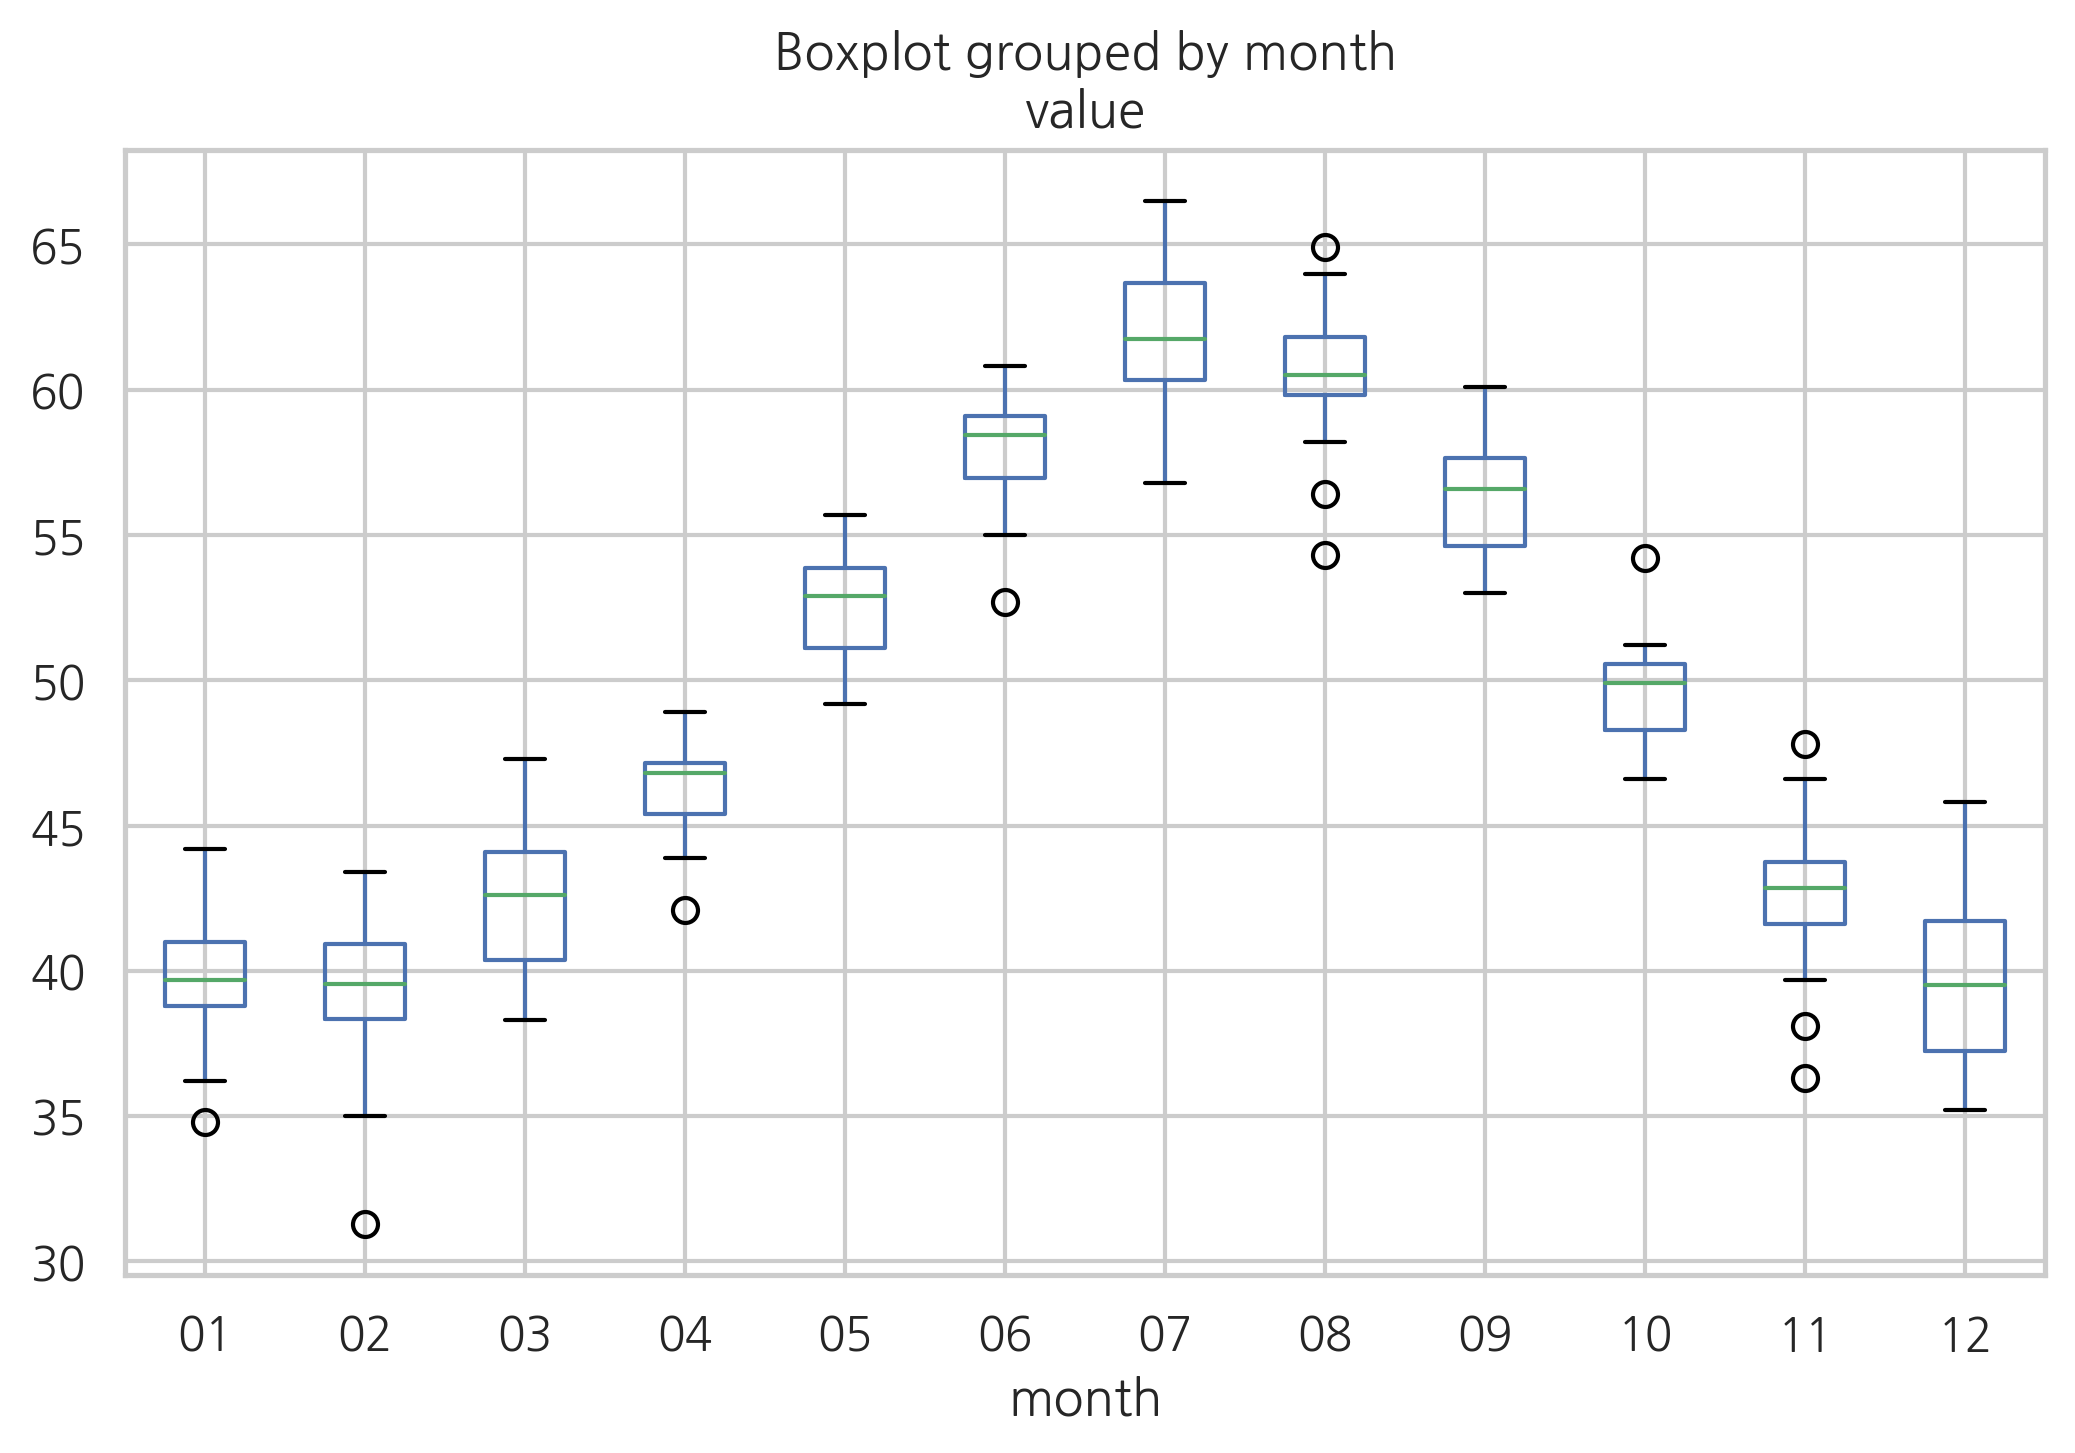

In [18]:
df_nottem.boxplot('value', 'month')
plt.show()

- $x$는 월을 나타내는 독립변수, $\hat{y}$는 월 평균기온을 나타내는 종속변수

In [19]:
# 더미변수 풀랭크방식

In [20]:
model = sm.OLS.from_formula('value ~ C(month) + 0', df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          2.96e-125
Time:                        19:19:01   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

In [21]:
# 더미변수 축소랭크방식(1월 기준월)

In [22]:
model = sm.OLS.from_formula('value ~ C(month)', df_nottem)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          2.96e-125
Time:                        19:19:01   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         39.6950      0.518     76.

- 축소랭크 방식을 쓰는 이유:
- t검정의 유의확률 : 0.491  

보스턴 집값 데이터 

In [23]:
#  상수값 가중치를 가지는 모형 == 축소랭크방식으로 더미변수 변환되어 있는 것

In [24]:
boston = sk.datasets.load_boston()

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
df_boston = pd.concat([dfX, dfy], axis=1)

model1 = sm.OLS.from_formula(
    'MEDV ~' + '+'.join(boston.feature_names), data=df_boston)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        19:19:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [25]:
# 상수값 가중치를 가지지 않는 모형 == 풀랭크방식으로 더미변수 변환 되어 있는 것

In [26]:
feature_names = list(boston.feature_names)
feature_names.remove('CHAS')
feature_names = [name for name in feature_names] + ['C(CHAS)']
model2 = sm.OLS.from_formula(
    'MEDV ~ ' + '+'.join(feature_names), data=df_boston)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          6.72e-135
Time:                        19:19:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         36.4595      5.103      7.

### 4.5 부분회귀

In [27]:
boston = sk.datasets.load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([dfX, dfy], axis=1)

model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()

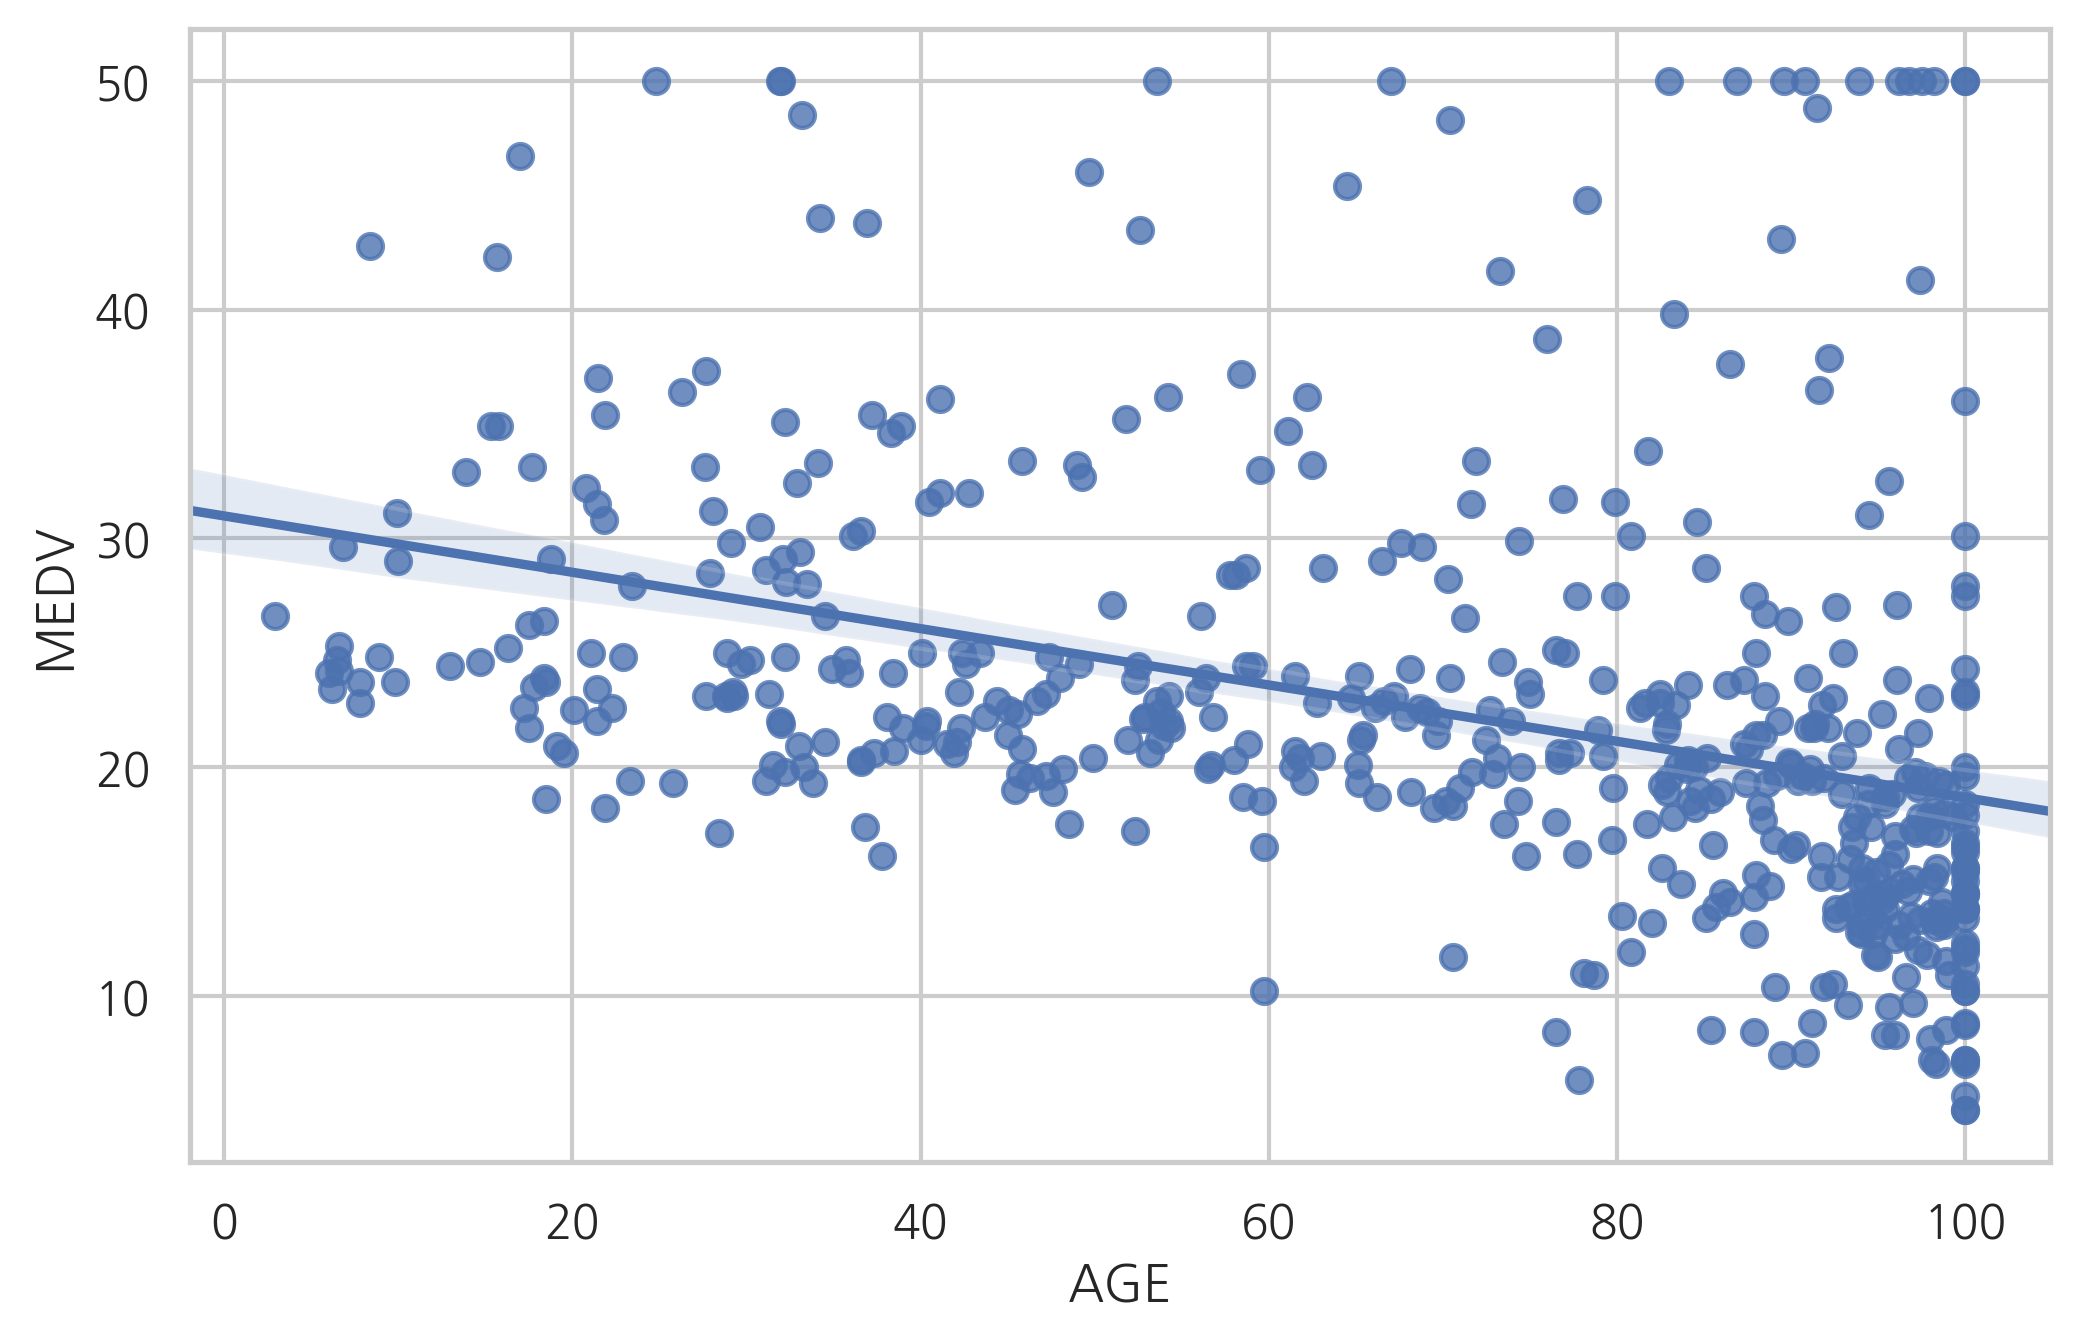

In [28]:
sns.regplot(x='AGE', y='MEDV', data=df)
plt.show()

**부분회귀 플롯**
- `sm.graphics.plot_partregress(endog, exog_i, exog_others, data=None, obs_labels=True, ret_coords=False)` 
    - endog : 종속변수 문자열
    - exog_i : 분석 대상이 되는 독립변수 문자열
    - exog_others : 나머지 독립변수 문자열 리스트
    - data : 모든 데이터가 있는 데이터프레임
    - obs_labels : 데이터 라벨링 여부
    - ret_coords : 잔차데이터 반환 여부

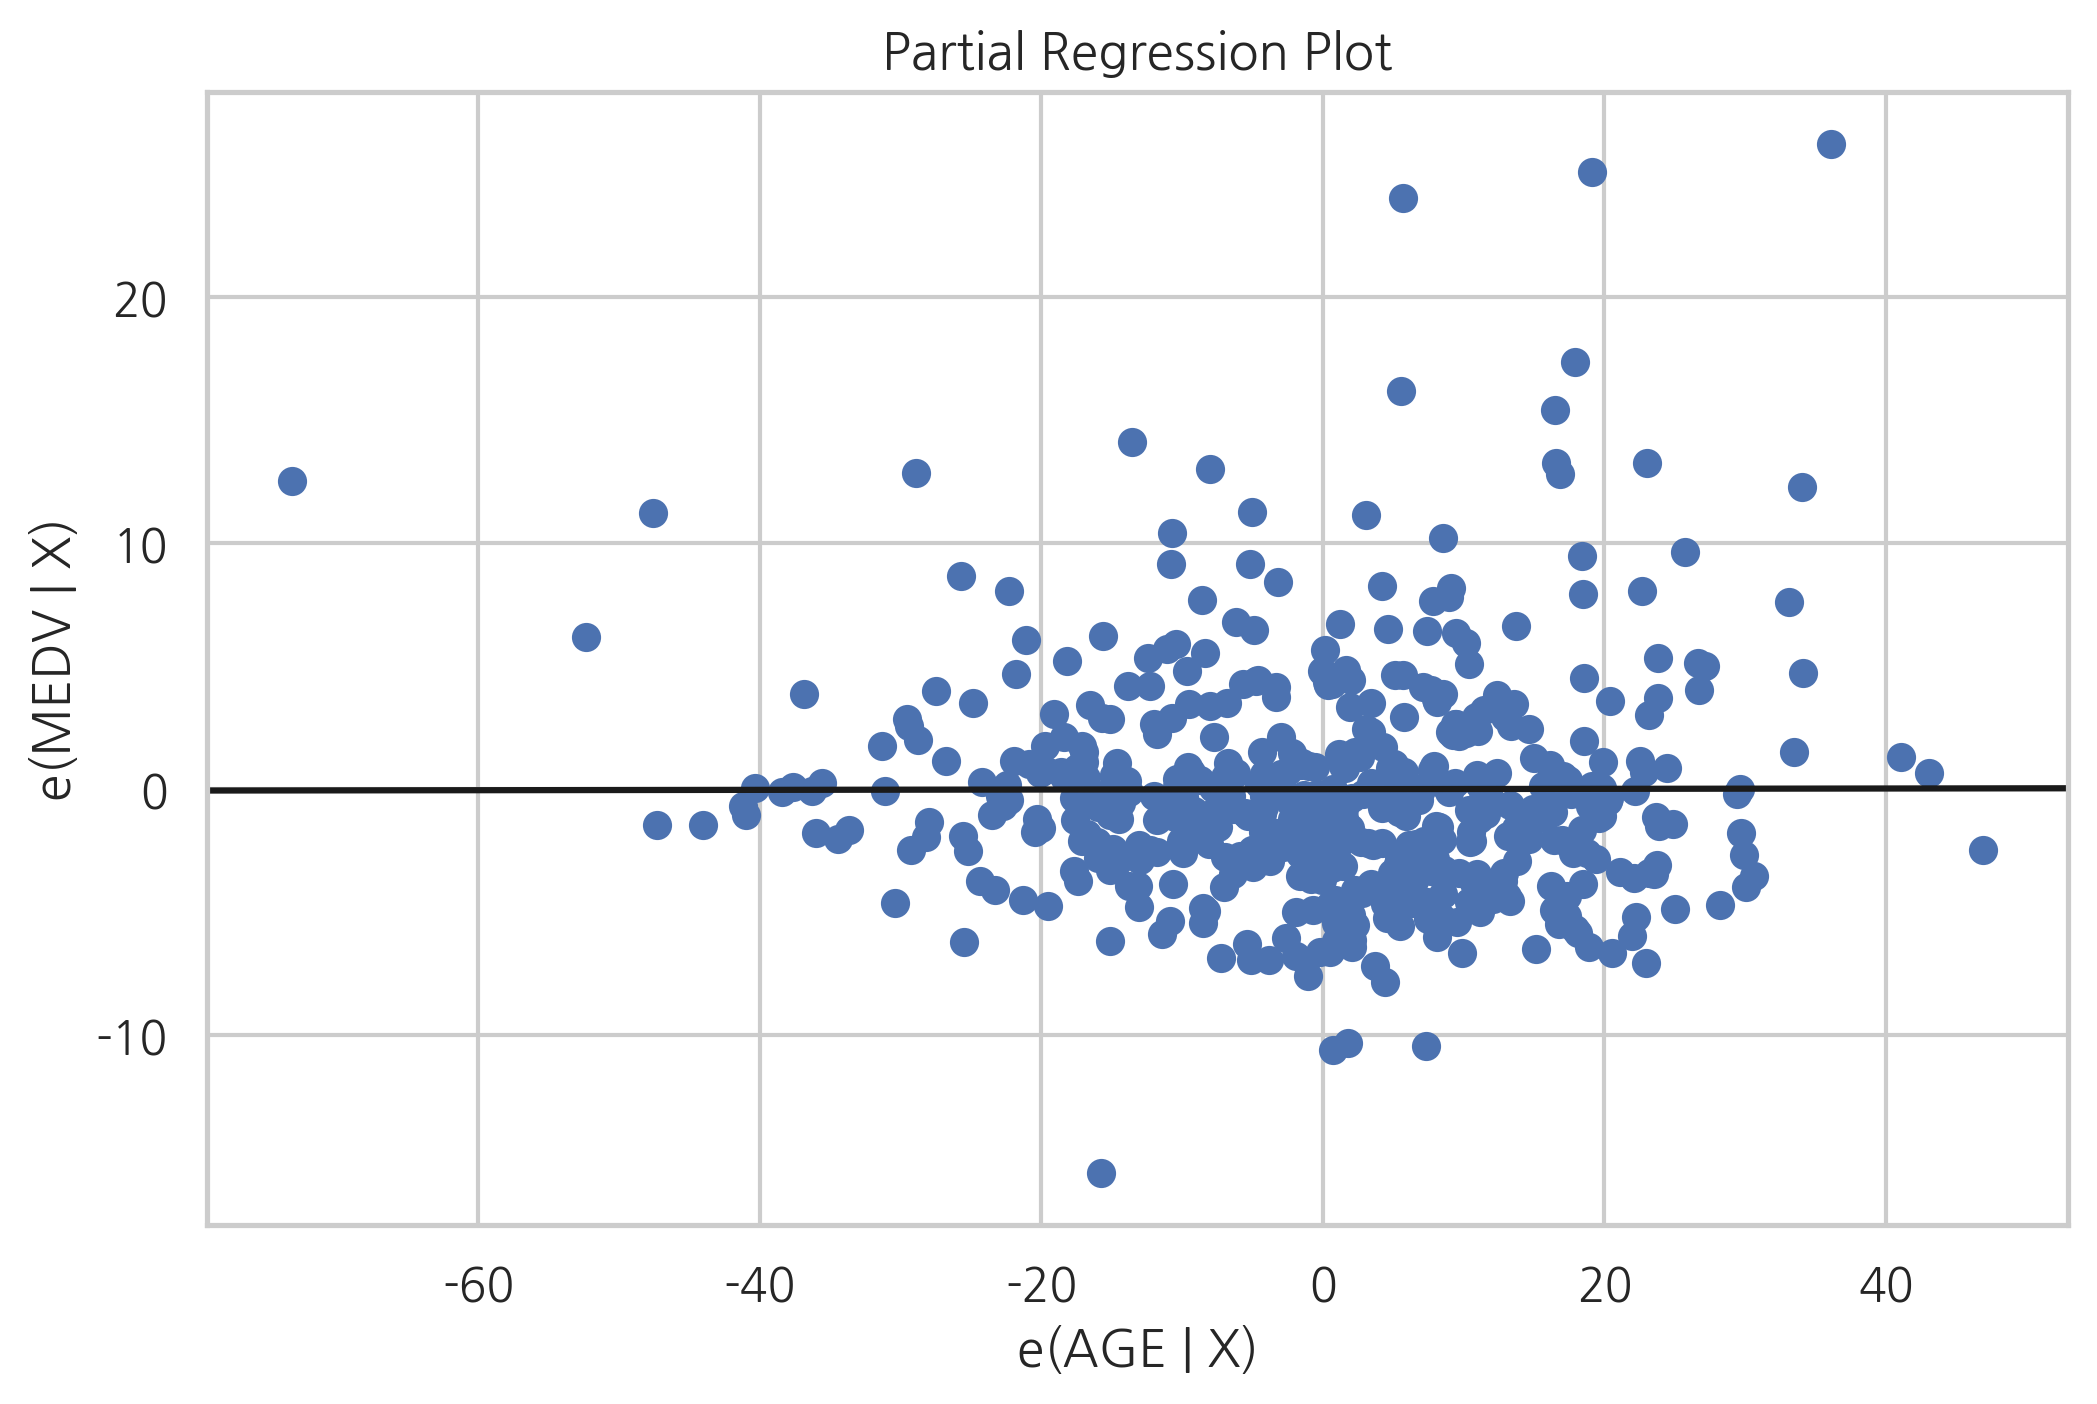

In [29]:
others = list(set(df.columns).difference(set(['MEDV', "AGE"])))
p, resids = sm.graphics.plot_partregress(
    'MEDV', 'AGE', others, data=df, obs_labels=False, ret_coords=True)
plt.show()

- 가로축 : 어떤 독립변수에서 다른 독립변수의 영향을 제거한 순수한 독립변수 성분을 뜻함

**전체 데이터 한번에 부분회귀 플롯**
- `sm.graphics.plot_partregress_grid(result, fig)`
    - result : 부분회귀 결과 객체
    - fig : plt.figure 객체

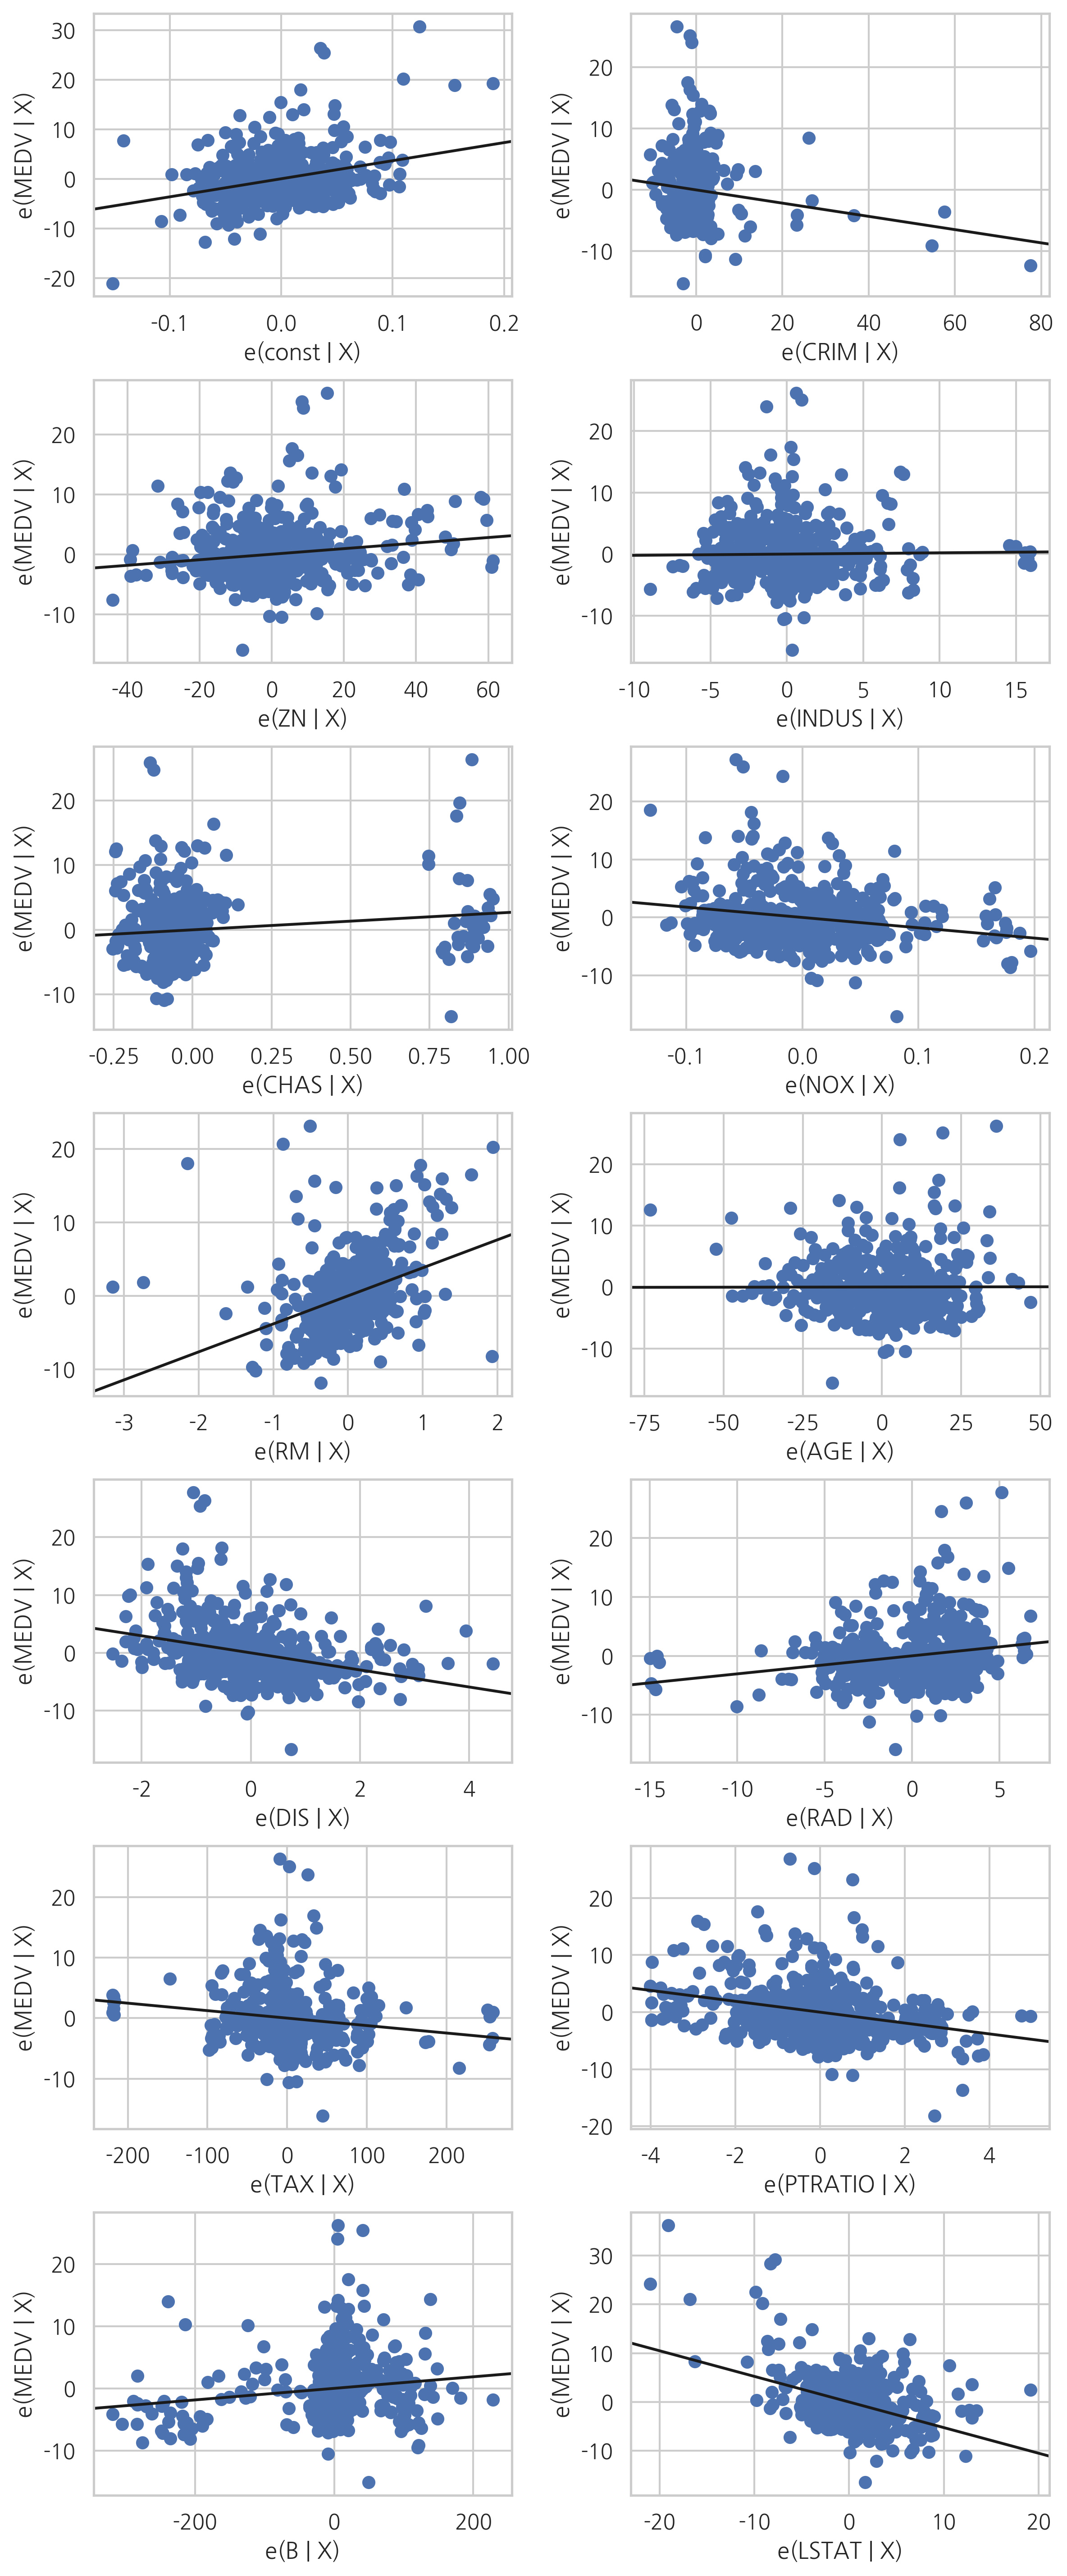

In [30]:
fig = plt.figure(figsize=(8, 20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
fig.suptitle('')
plt.show()

**CCPR플롯**
- 특정한 하나의 변수의 영향을 살펴보기 위함
- 가로축 : $x_i$
- 세로축 : ${w_i}{x_i} + e$
- `sm.graphics.plot_ccpr(result, exog_idx)`
    - result : 회귀분석 결과 객체
    - exog_idx : 분석 대상이 되는 독립변수 문자열

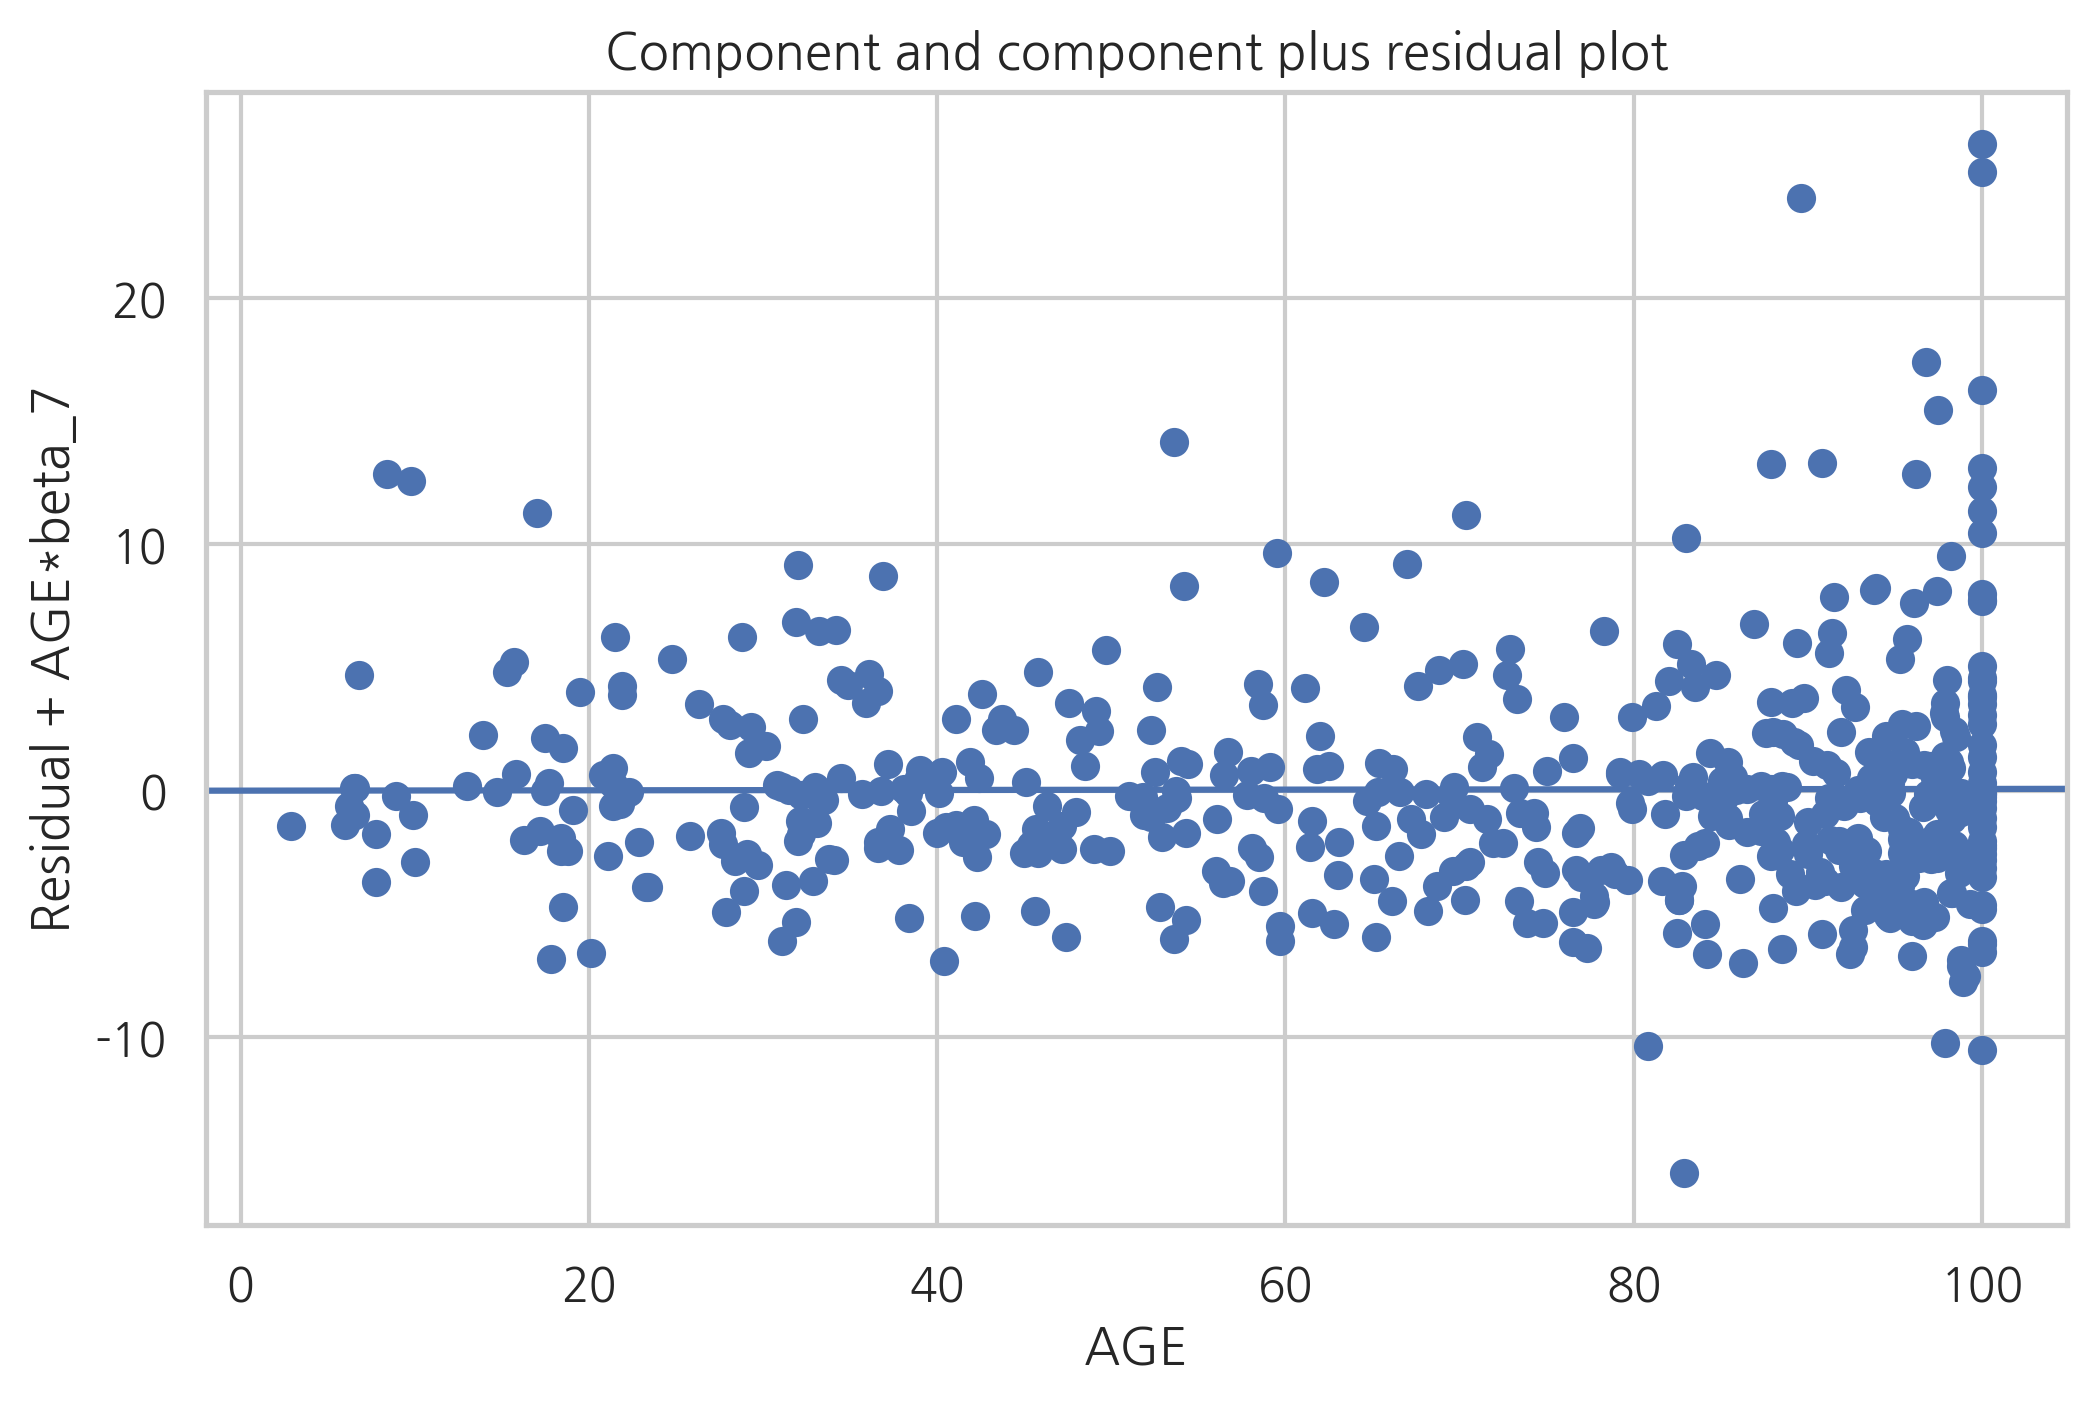

In [31]:
sm.graphics.plot_ccpr(result_boston, 'AGE')
plt.show()

**모든 변수에 대한 CCPR 플롯**
- `sm.graphics.plot_ccpr_grid(result, fig)`
    - result : 회귀분석 결과 객체
    - exog_idx : 분석 대상이 되는 독립변수 문자열

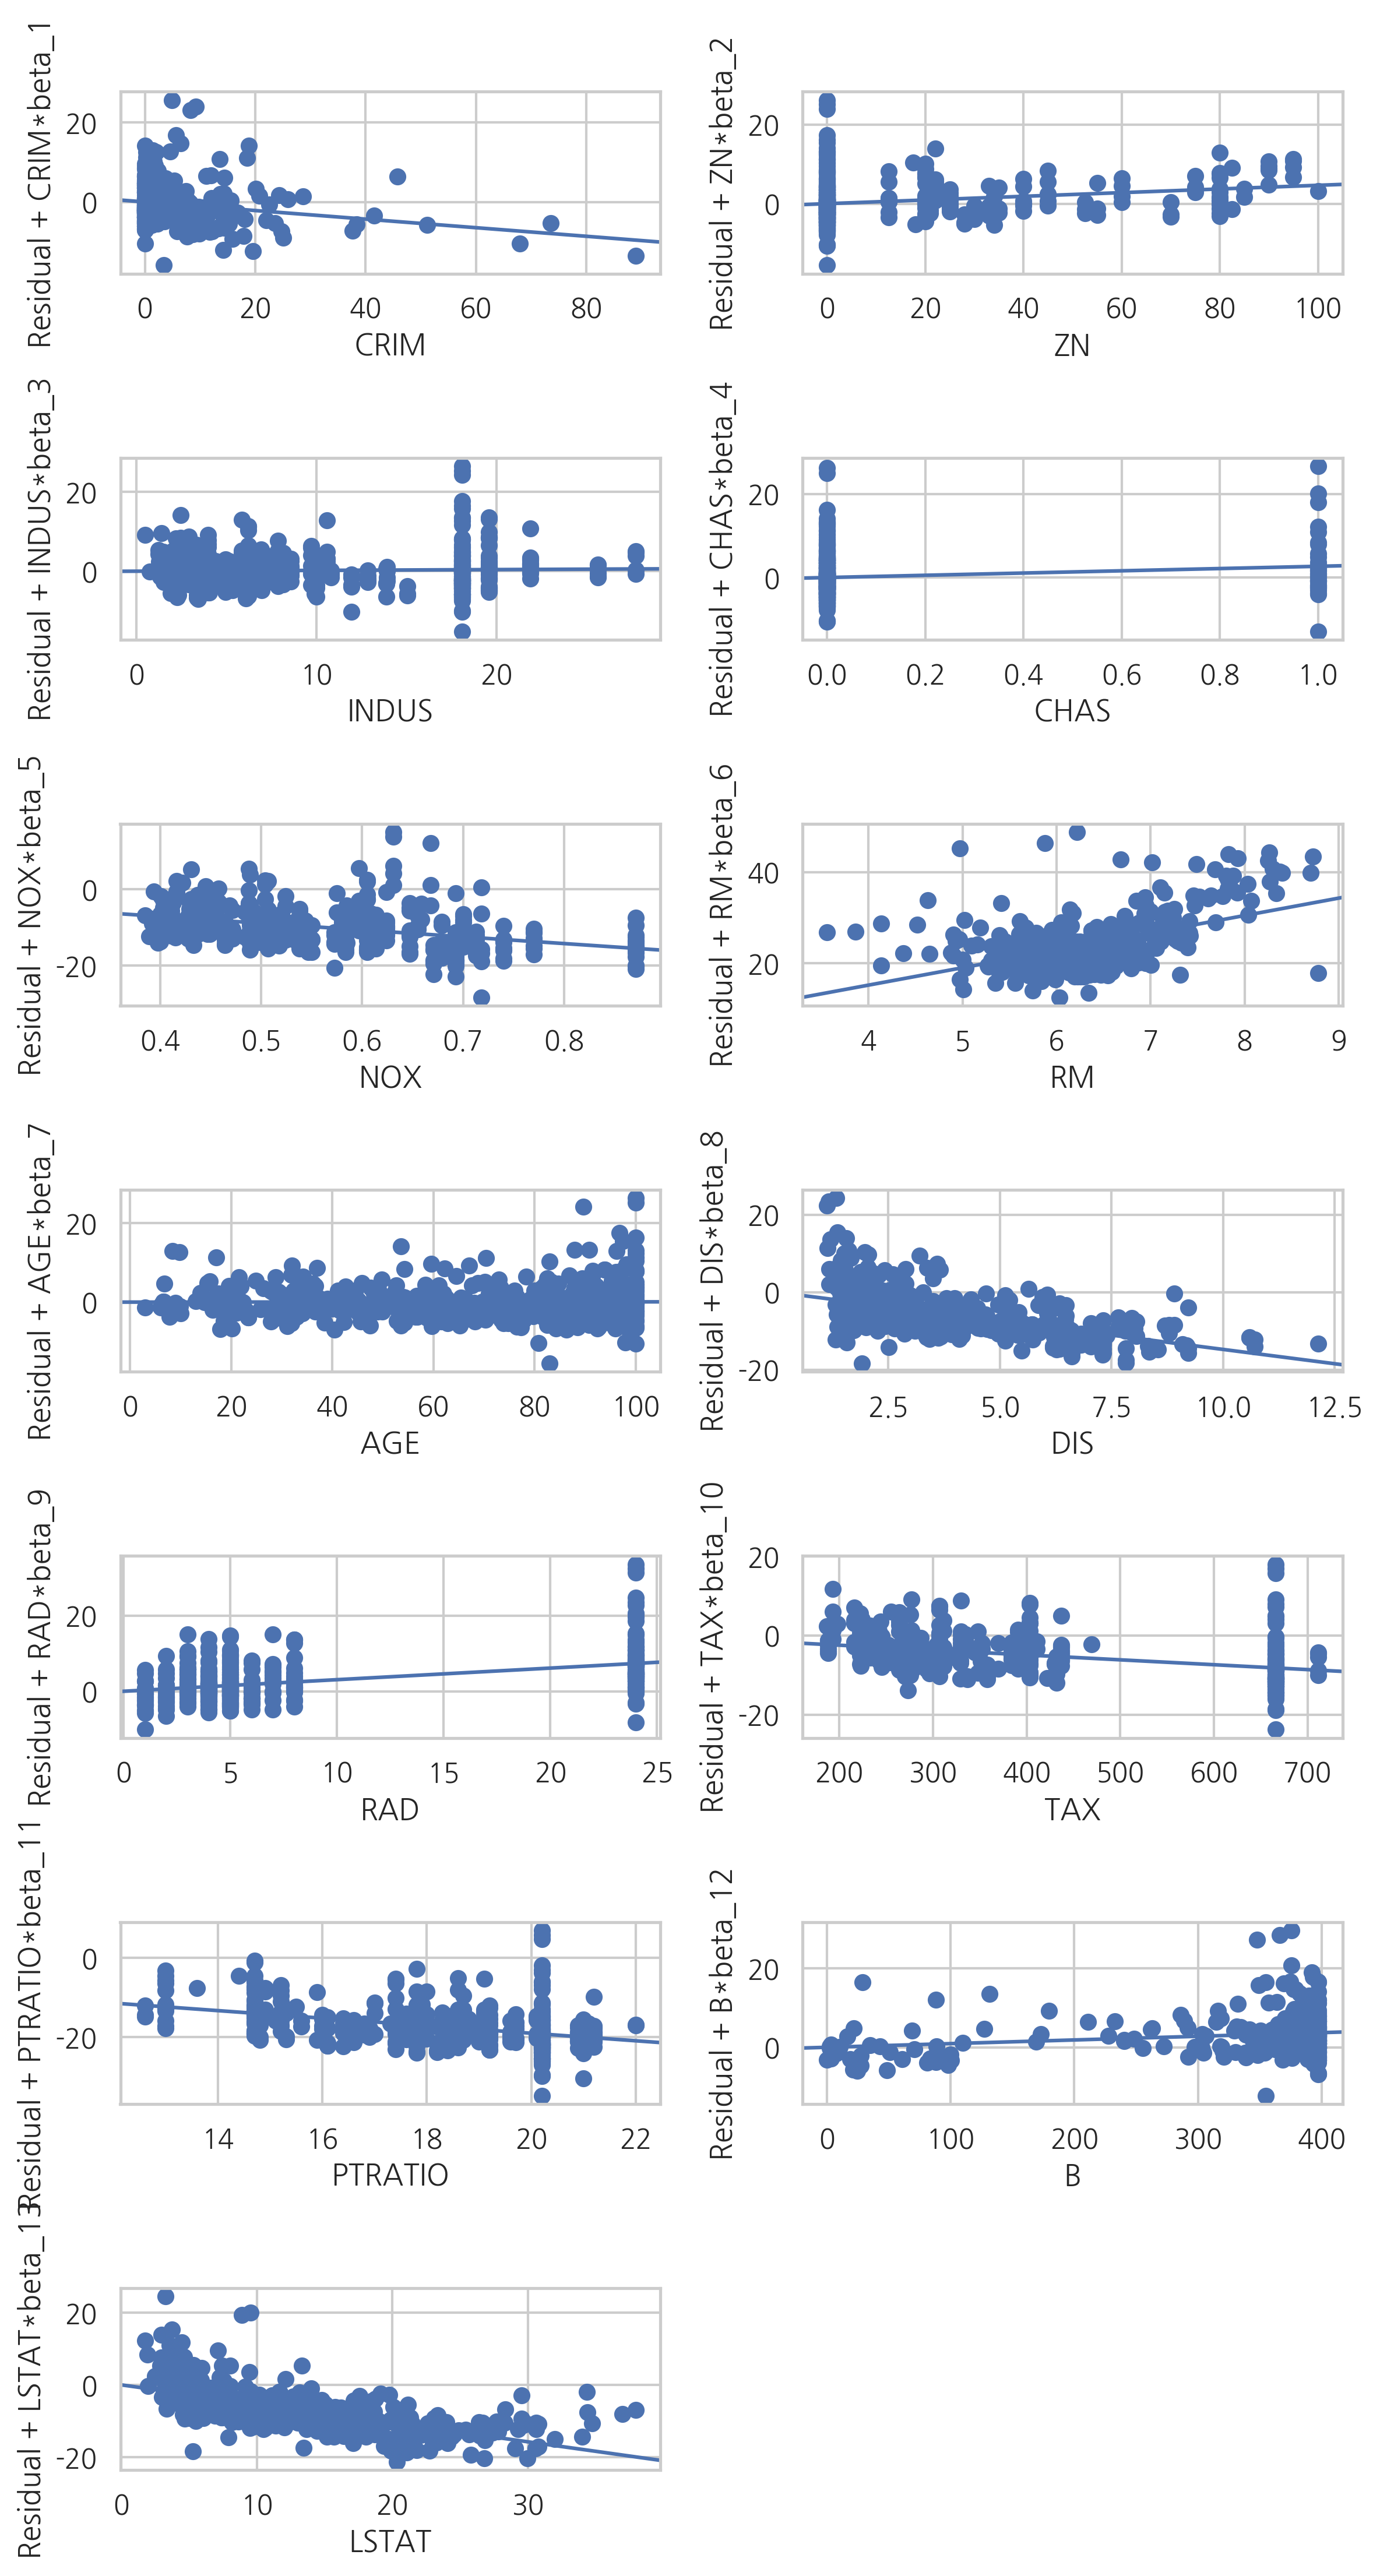

In [32]:
fig = plt.figure(figsize=(8, 15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
fig.suptitle('')
plt.show()

**부분회귀 플롯과 CCPR 같이**
- `sm.graphics.plot_regress_exog(result, exog_idx)`
    - result : 회귀분석 결과 객체
    - exog_idx : 분석 대상이 되는 독립변수 문자열

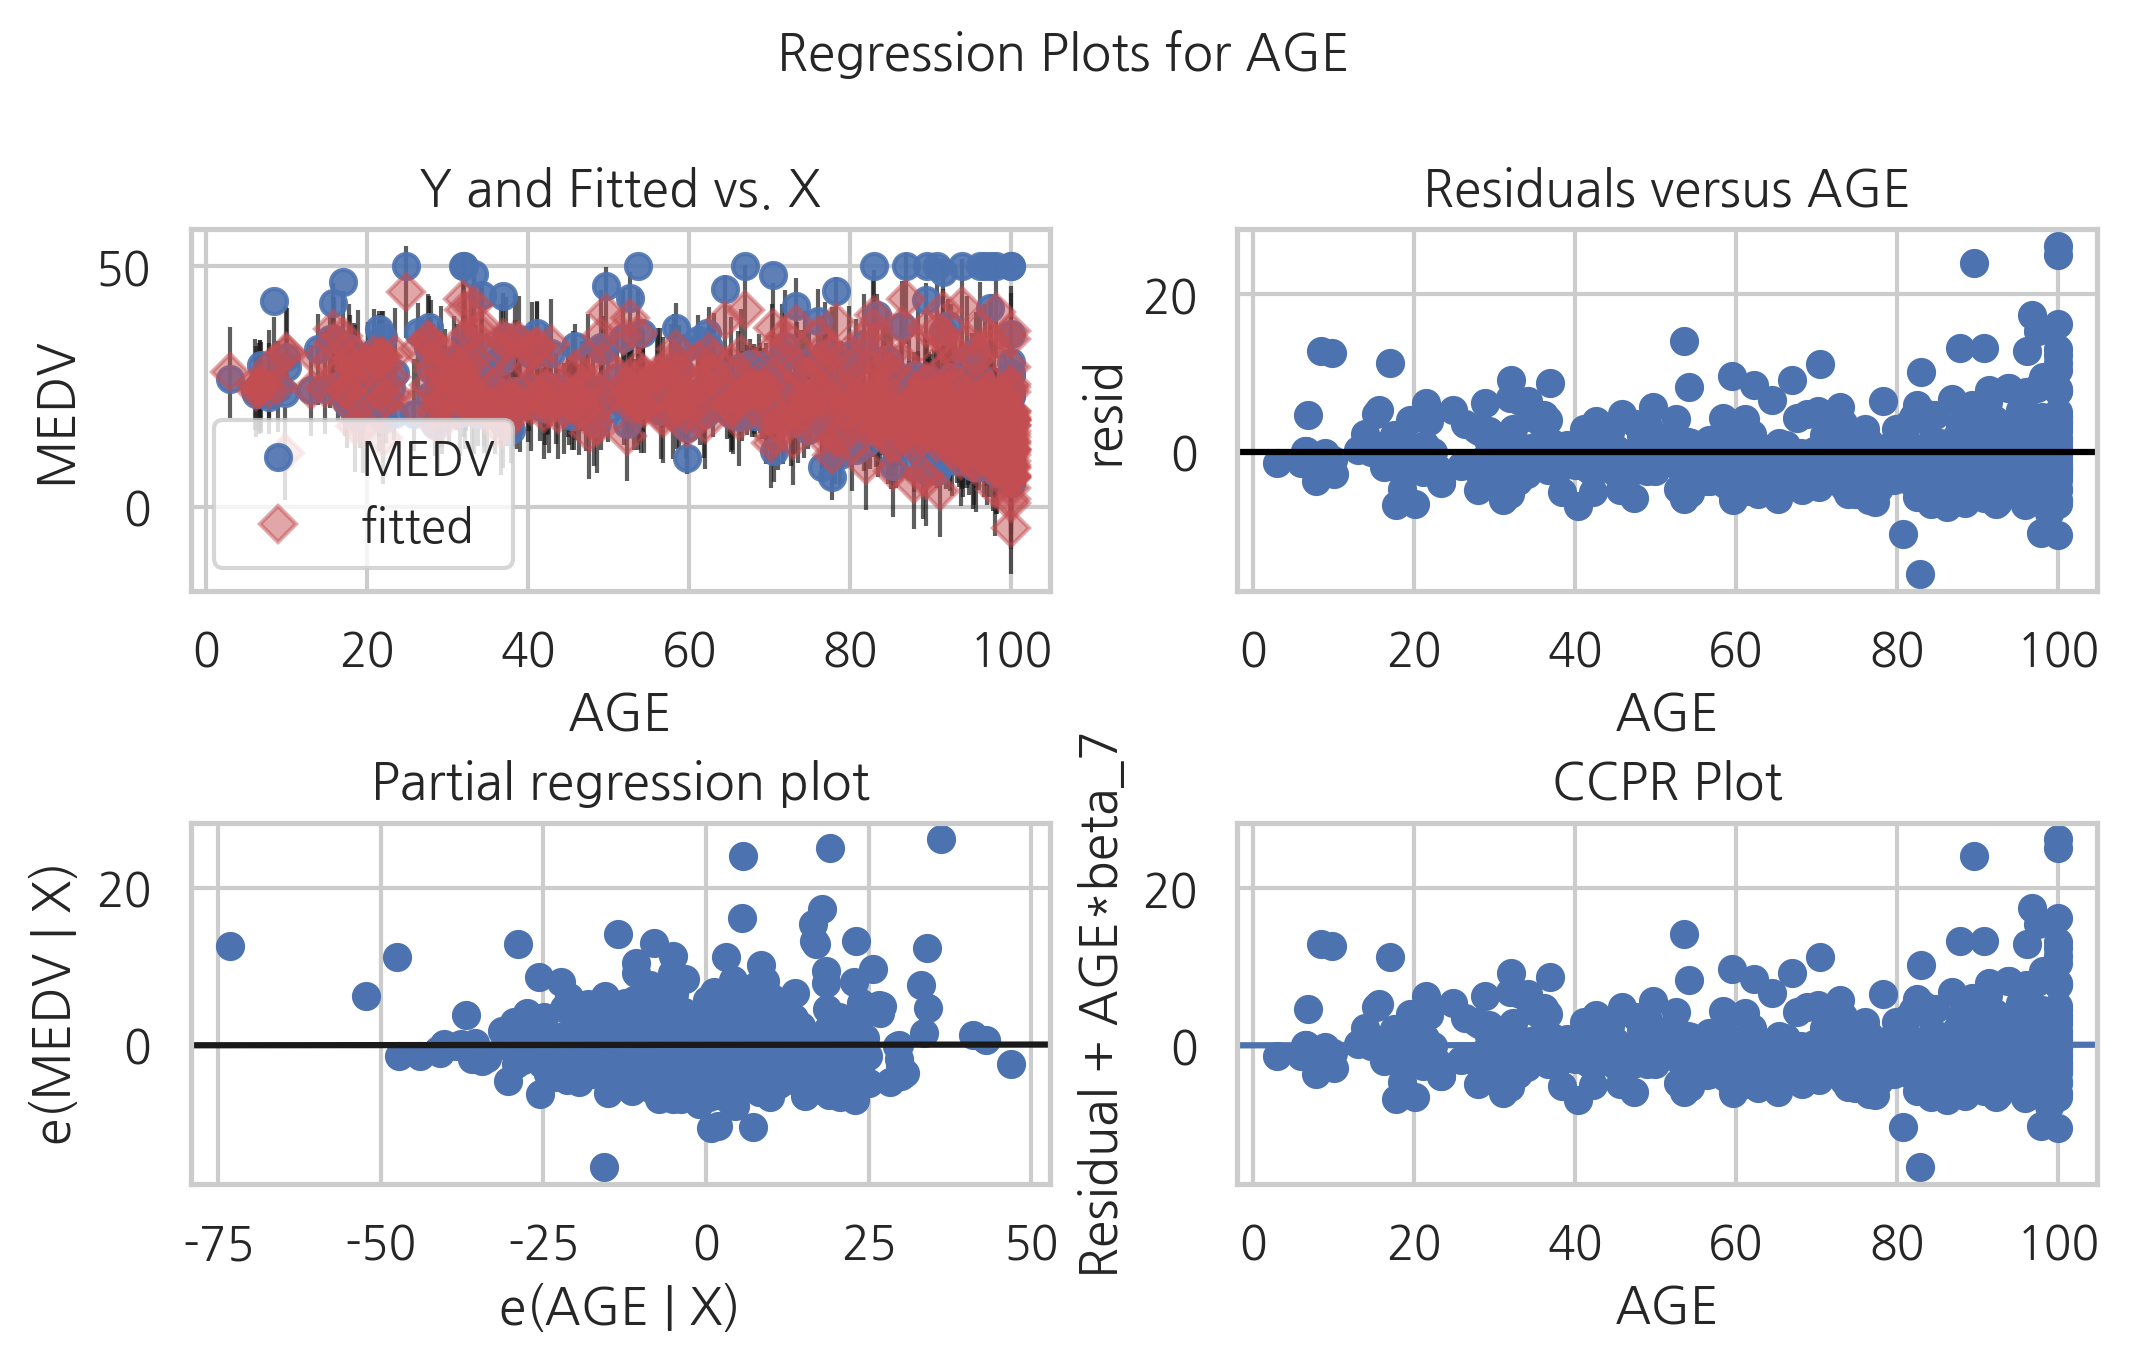

In [33]:
fig = sm.graphics.plot_regress_exog(result_boston, 'AGE')
plt.tight_layout(pad=4, h_pad=0.5, w_pad=0.5)
plt.show()

### 5.1 확률론적 선형회귀모형

부트스트래핑

In [34]:
X0, y, coef = sk.datasets.make_regression(
    n_samples=100, n_features=1, noise=20, coef=True, random_state=0)
coef

array(42.38550486)

In [35]:
dfX0 = pd.DataFrame(X0, columns=['X1'])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=['y'])
model = sm.OLS(dfy, dfX)
result = model.fit()

In [36]:
result.params

const    -1.628364
X1       42.853356
dtype: float64

In [42]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           2.21e-36
Time:                        19:20:39   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

In [37]:
# 재표본화 하여 회귀분석 1000번 반복

In [38]:
N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1

Text(0.5, 1.0, '$\\hat{w}_0$ 추정치 분포')

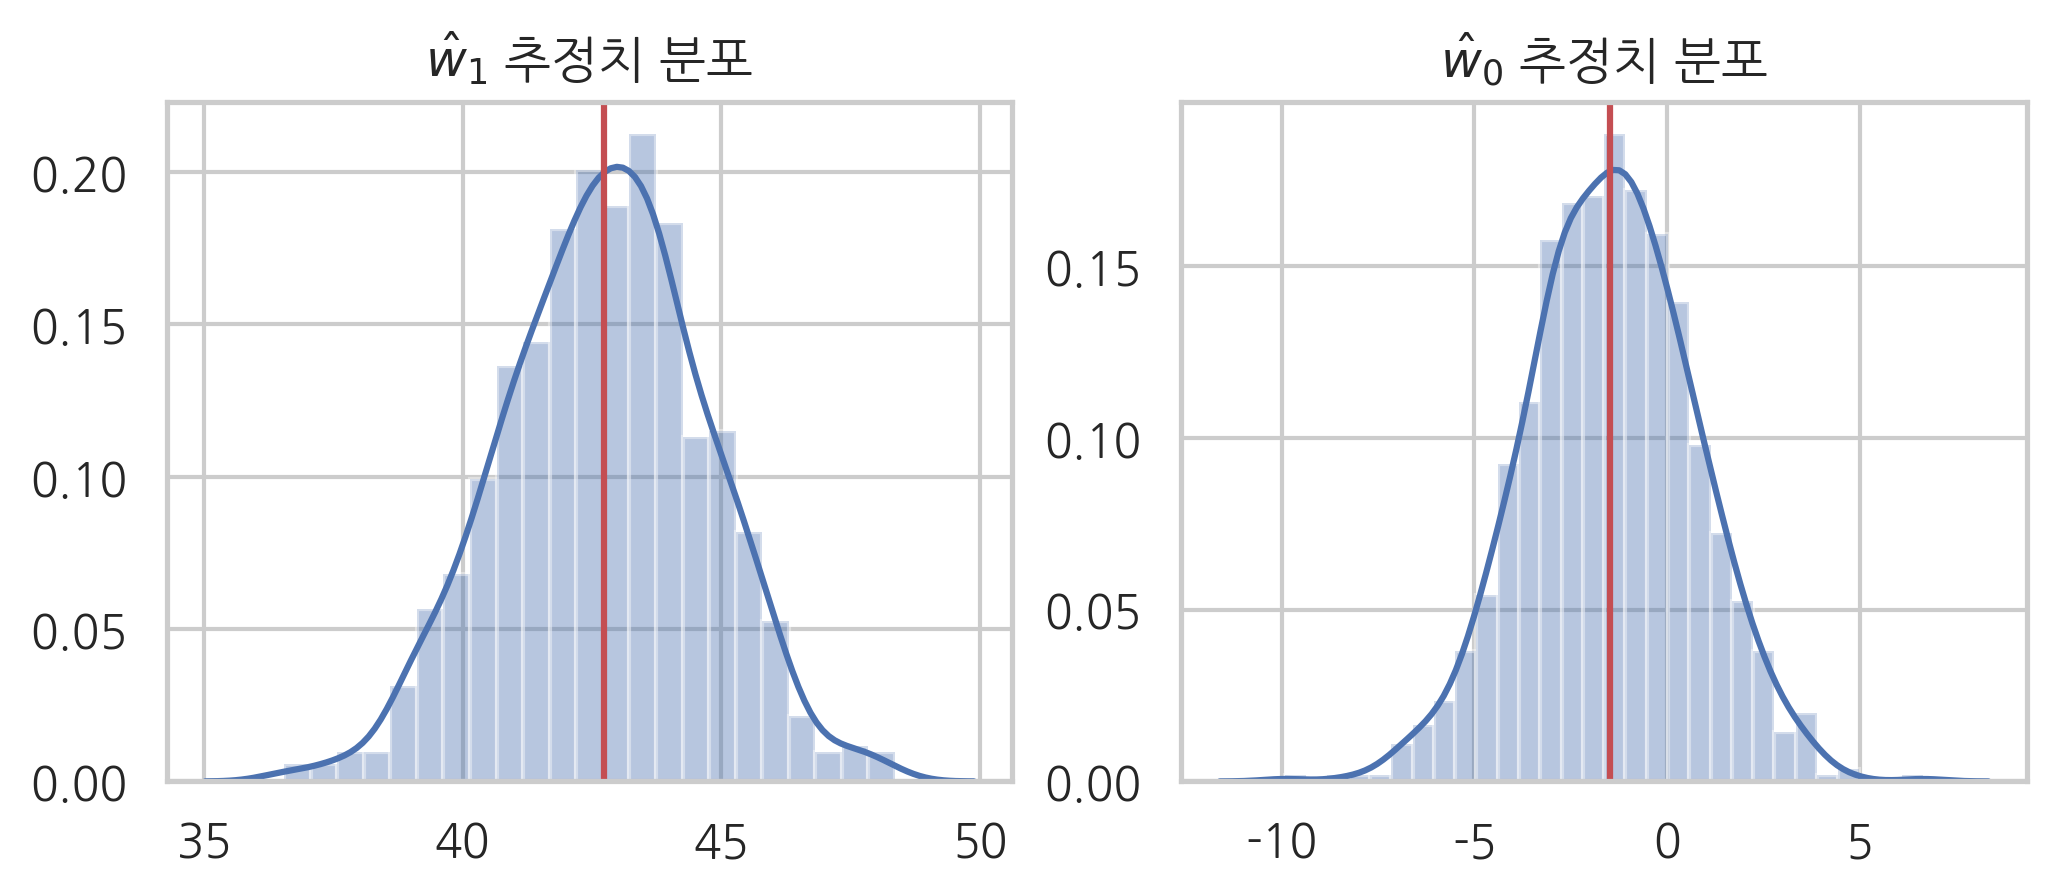

In [39]:
# 전체 가중치 추정값 히스토그램
plt.figure(figsize=(8, 3))
ax1 = plt.subplot(121)
sns.distplot(params_w1, ax=ax1)
plt.axvline(params_w1.mean(), c='r')
plt.title('$\hat{w}_1$ 추정치 분포')

ax2 = plt.subplot(122)
sns.distplot(params_w0, ax=ax2)
plt.axvline(params_w0.mean(), c='r')
plt.title('$\hat{w}_0$ 추정치 분포')

In [40]:
params_w1.mean(), params_w1.std()

(42.731992314745845, 1.9530358478835672)

In [41]:
params_w0.mean(), params_w0.std()

(-1.4688921900103162, 2.163069580390292)

In [42]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           2.21e-36
Time:                        19:20:39   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

확률론적 선형 회귀모형
1. 선형 정규분포가정 
    - 종속변수 $y$가 독립변수 $x$의 선형조합으로 결정되는 기댓값과 고정된 분산 $\sigma^2$을 가지는 가우시안 정규분포이다
2. 왜생성(Exogeneity) 가정
    - 잡음 $\epsilon$의 기댓값은 독립변수 $x$의 크기에 상관없이 항상 0이다
    - $E[\epsilon|x]=0$ -> $E[\epsilon]$
3. 조건부 독립 가정 
    - $i$번째 표본의 잡음 $\epsilon_i$와 $j$번째 표본의 잡음 $\epsilon_j$의 공분산 값이 $x$와 상관없이 항상 0이다
    - $Cov[\epsilon_i,  \epsilon_j|x]=0$ -> $E[\epsilon_i,  \epsilon_j]=0$
    - $Cov[\epsilon] = E[\epsilon\epsilon^T] = diagonal-matrix$
4. 등분산성 가정
    - $i$번째 표본의 잡음 $\epsilon_i$와 $j$번째 표본의 잡음 $\epsilon_j$의 분산 값이 표본과 상관없이 항상 같다
    - $Cov[\epsilon] = E[\epsilon\epsilon^T] = \sigma^2I$

잔차의 분포
- 잔차 $e = y - \hat{w}^Tx$도 정규분포를 따른다

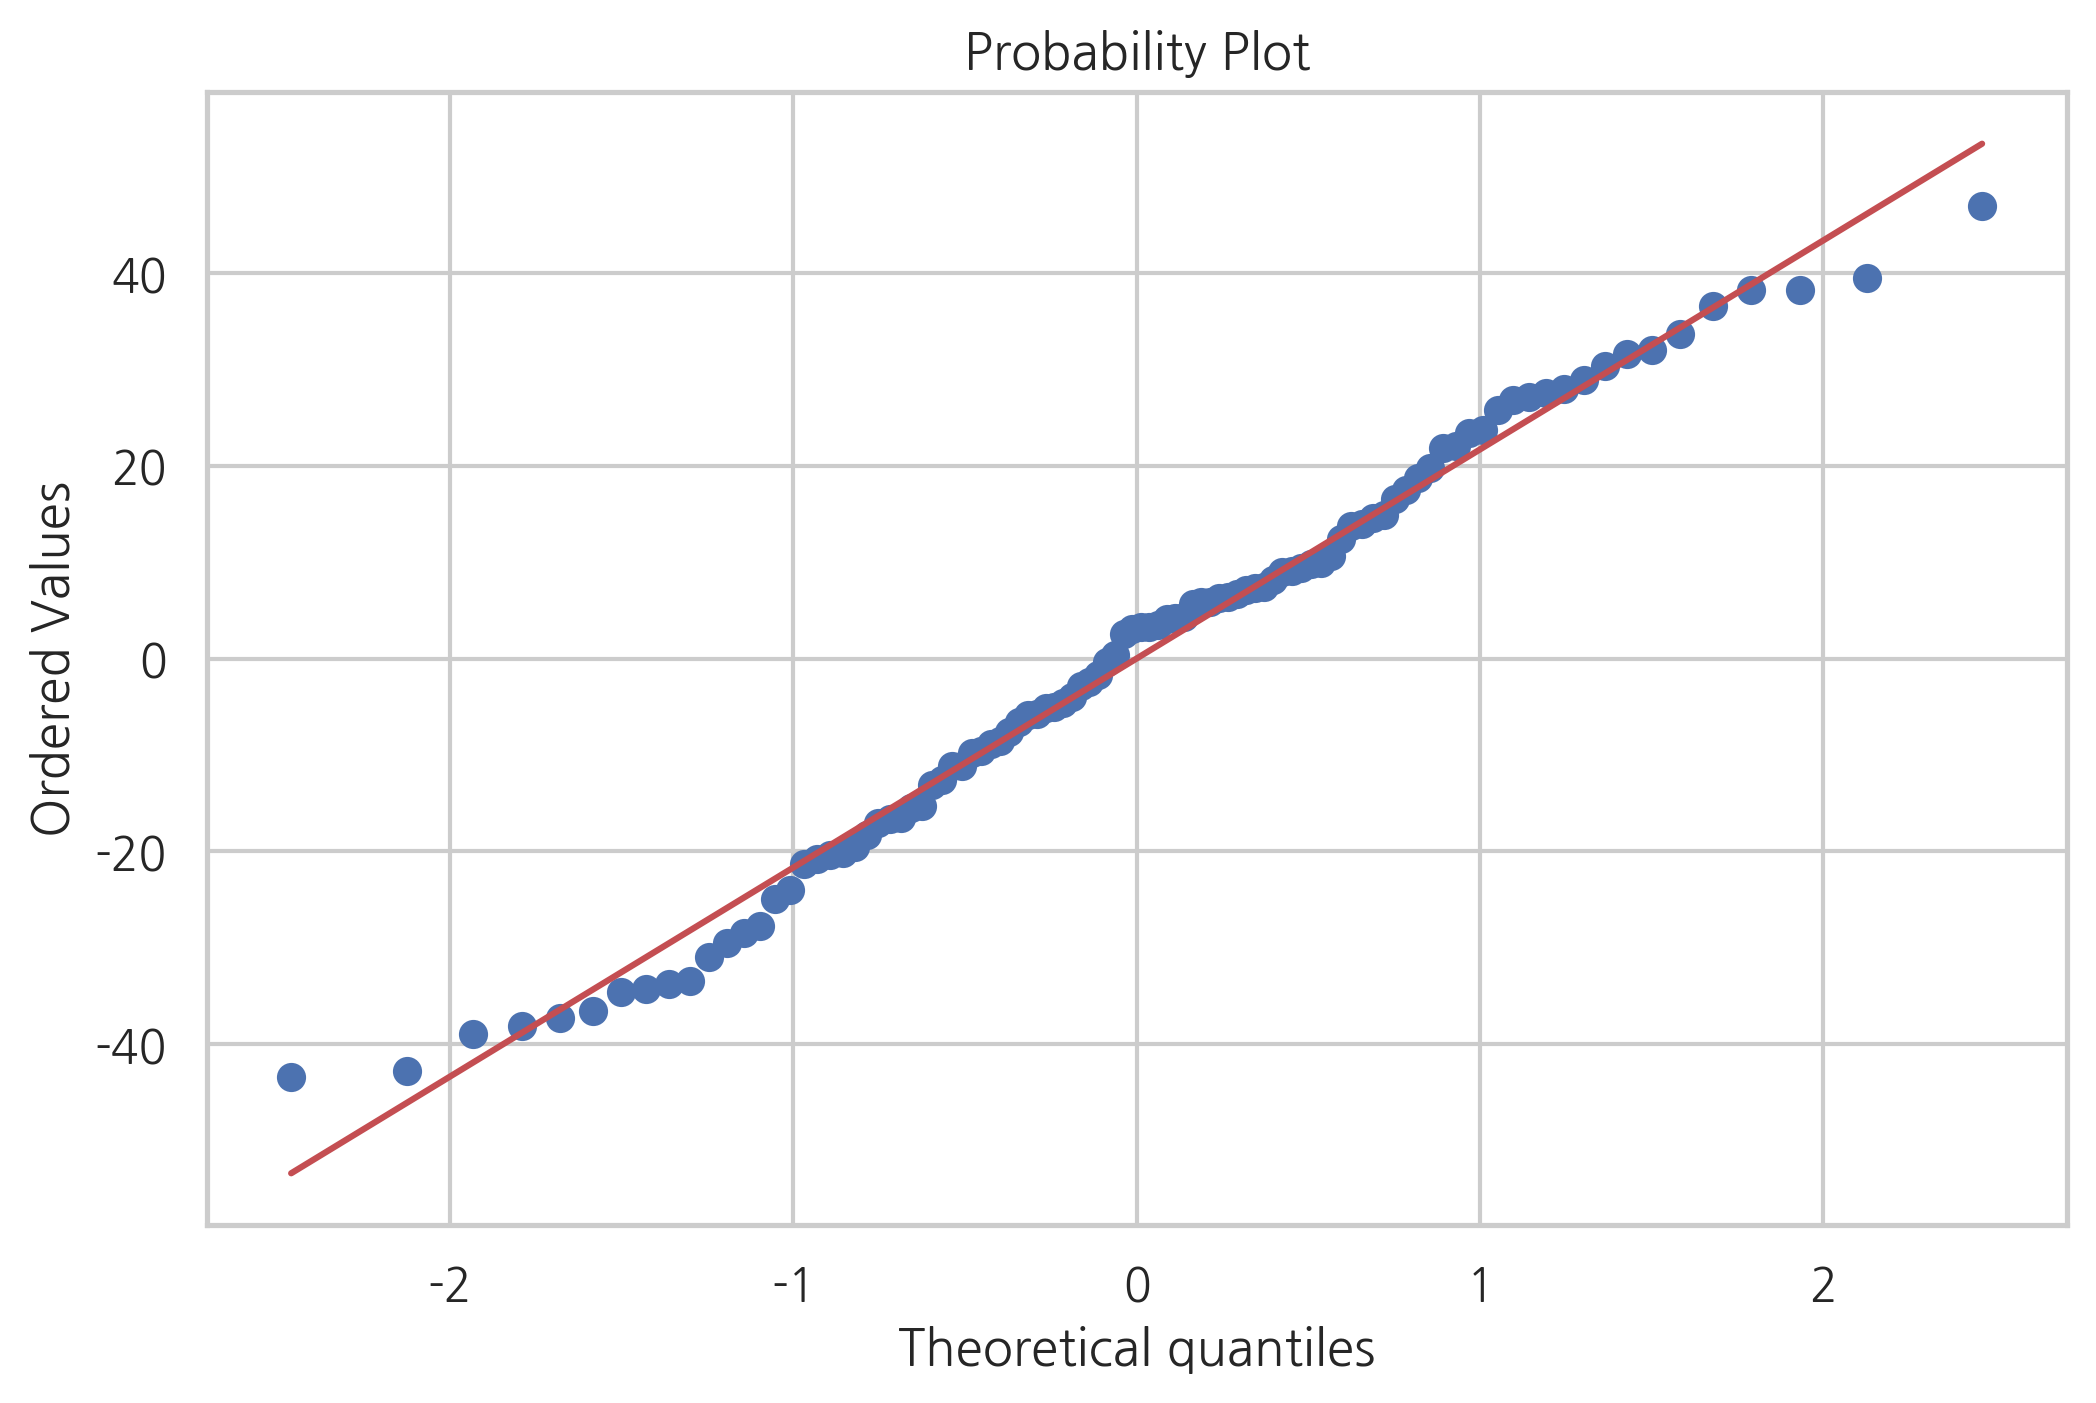

In [43]:
sp.stats.probplot(result.resid, plot=plt)
plt.show()

잔차의 정규성

In [44]:
test = sm.stats.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print('%-12s: %6.3f' % xi)

Chi^2       :  3.523
P-value     :  0.172


- 유의확률이 17%가 넘기 때문에 귀무가설을 채택하여, 정규분포가 맞다는 결론

In [45]:
test = sm.stats.jarque_bera(result.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print('%-12s: %6.3f' % xi)

Jarque-Bera :  2.059
P-value     :  0.357
Skew        : -0.073
Kurtosis    :  2.312


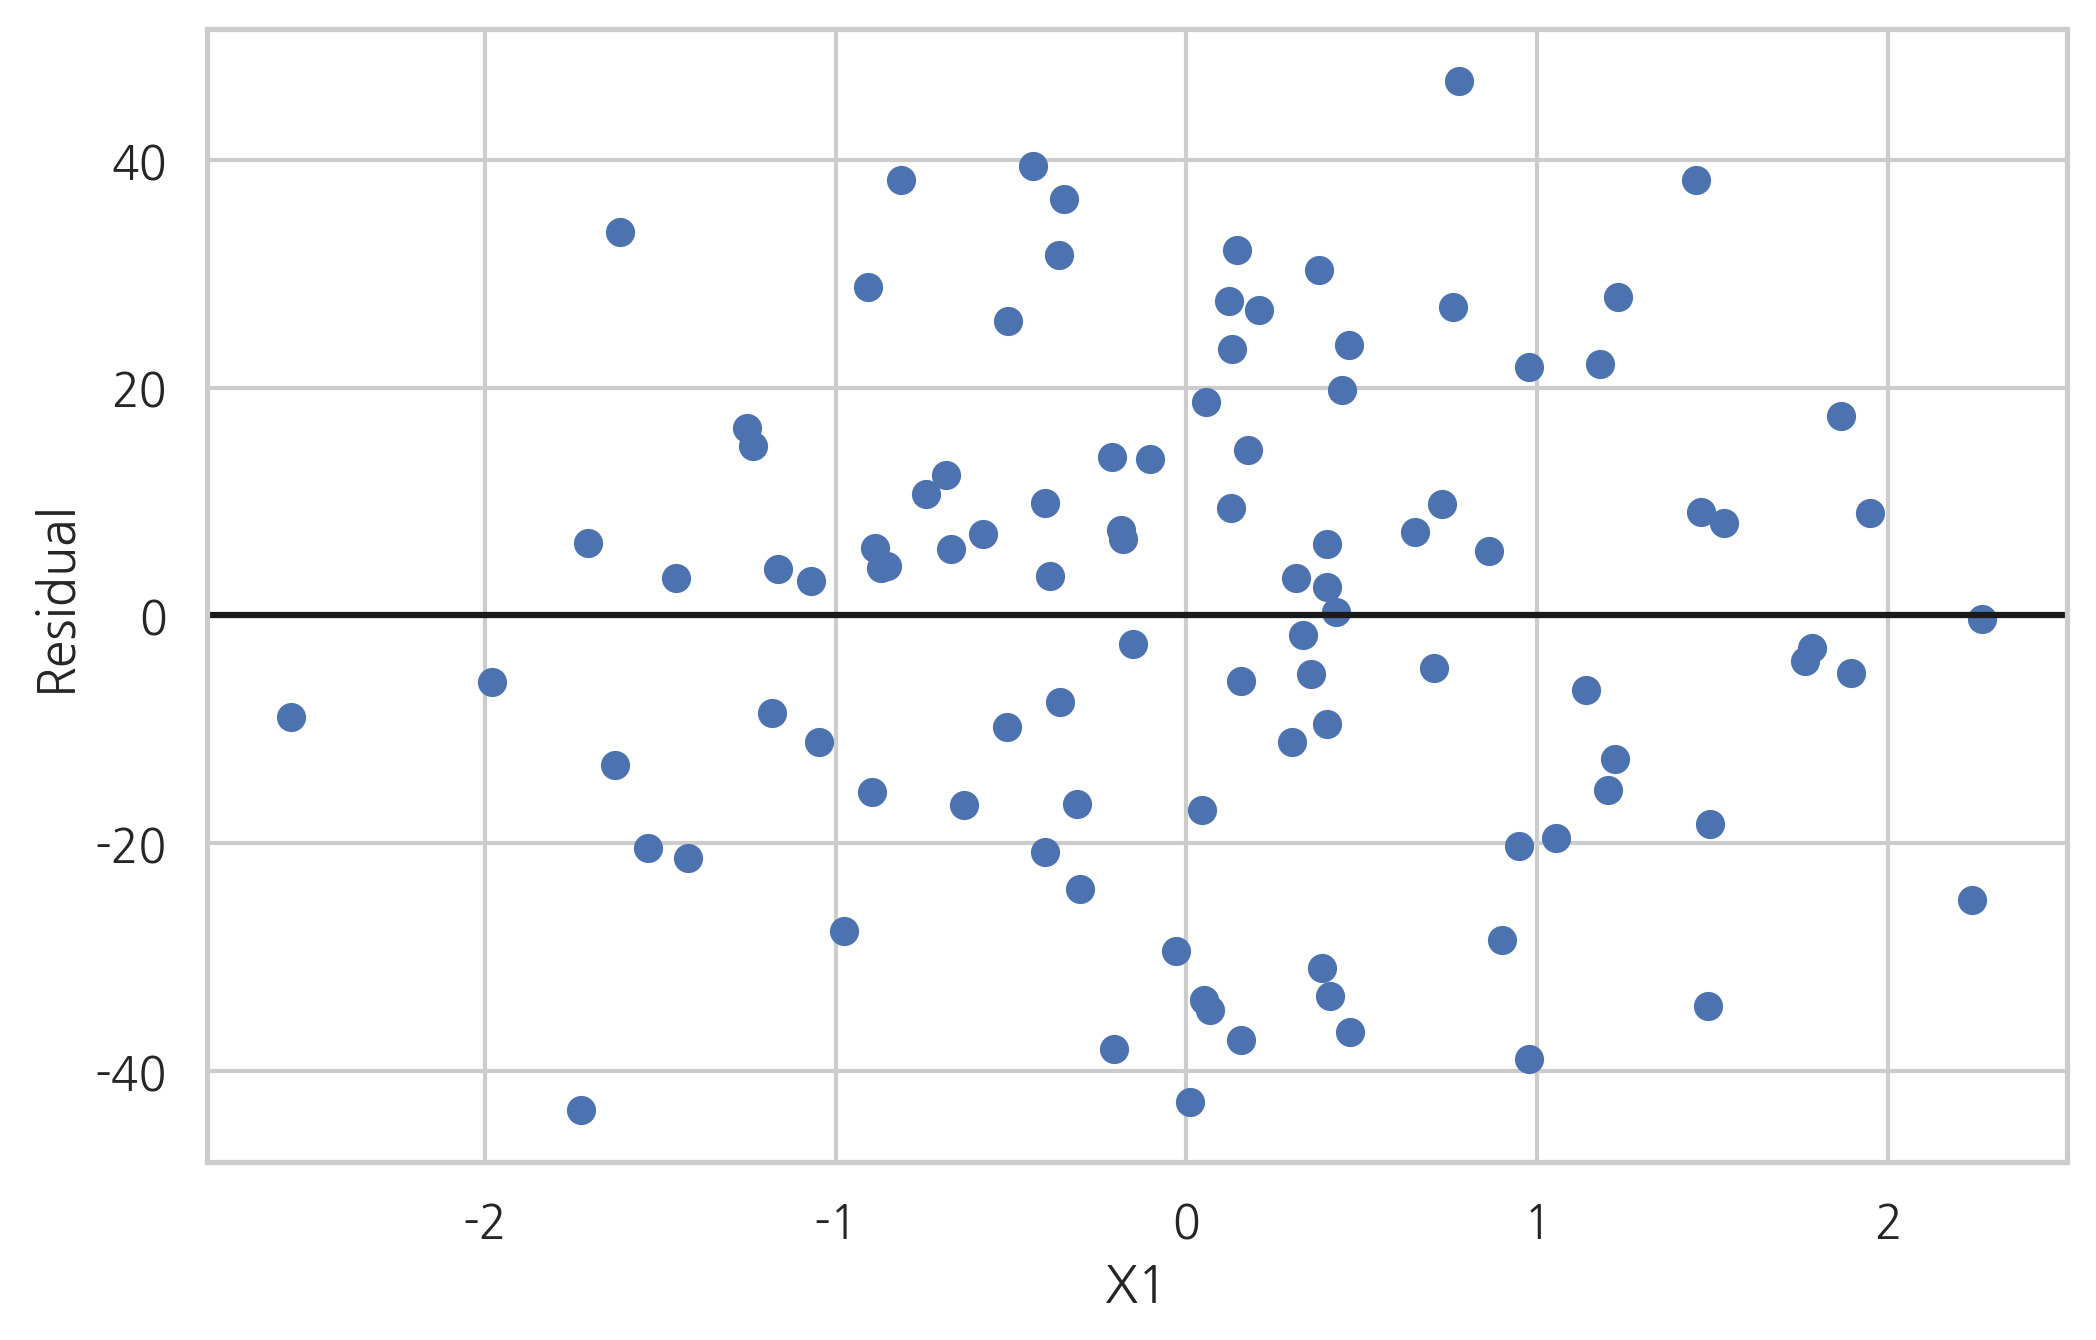

In [46]:
plt.plot(X0, result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel('X1')
plt.ylabel('Residual')
plt.show()

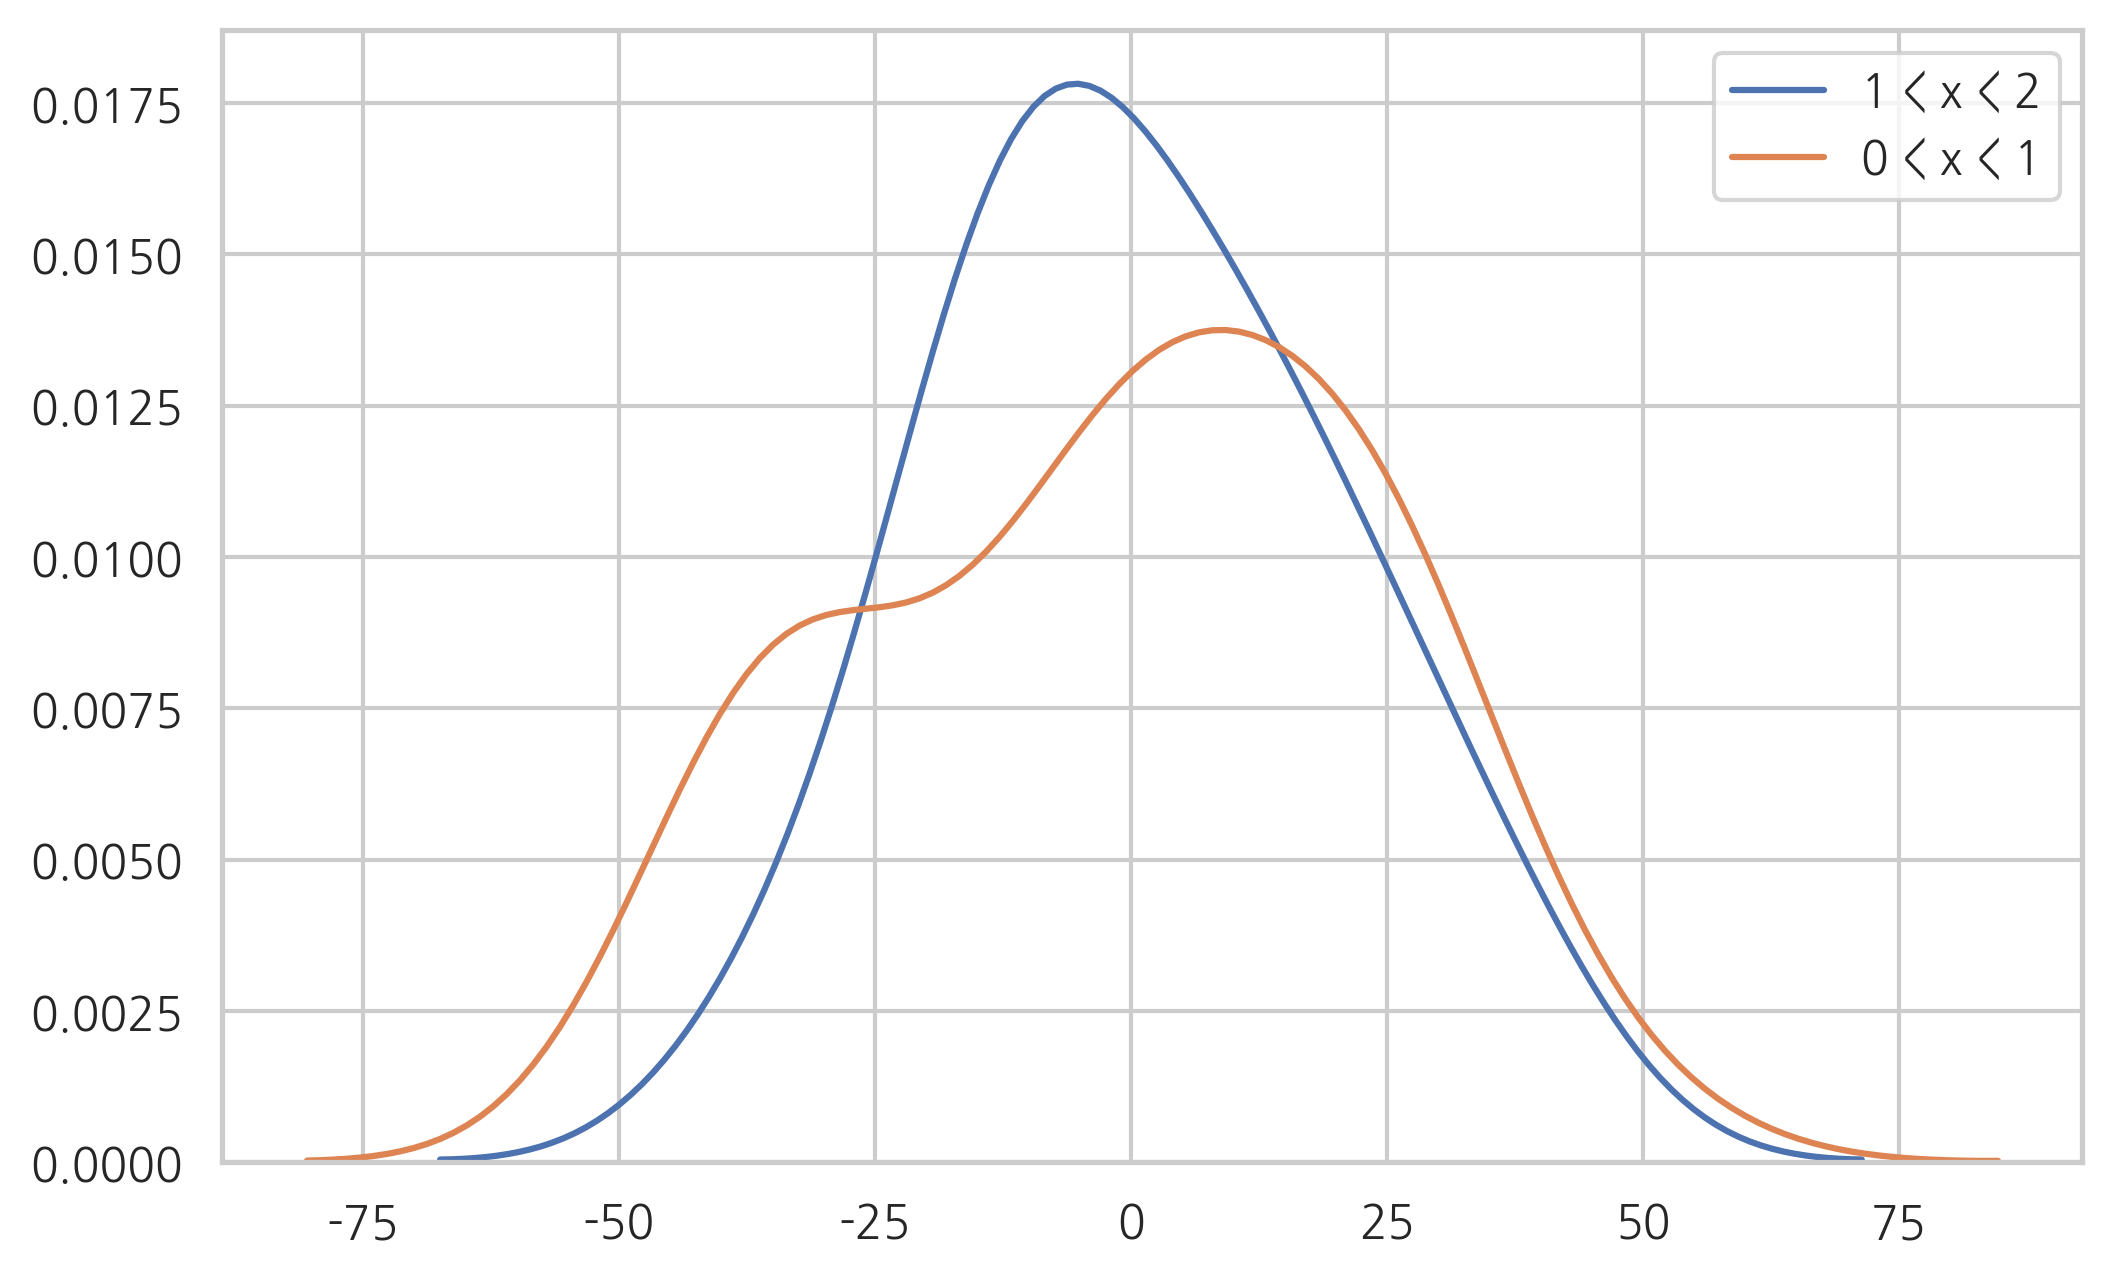

In [47]:
sns.kdeplot(result.resid[((1 < X0) & (X0 < 2)).flatten()], label='1 < x < 2')
sns.kdeplot(result.resid[((0 < X0) & (X0 < 1)).flatten()], label='0 < x < 1')
plt.legend()
plt.show()

단일계수 t-검정

In [48]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           2.21e-36
Time:                        20:02:56   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

In [49]:
print(result.t_test('X1 = 40'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            42.8534      2.142      1.332      0.186      38.603      47.104


- X1의 계수를 40으로 해도 문제가 없다

In [50]:
import datetime
from calendar import isleap

df_nottem = sm.datasets.get_rdataset('nottem').data

def convert_partial_year(number):
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

In [51]:
convert_partial_year(10)

datetime.datetime(10, 1, 1, 0, 0)

In [54]:
df_nottem['date0'] = df_nottem[['time']].applymap(convert_partial_year)
df_nottem['date'] = pd.DatetimeIndex(df_nottem['date0']).round('60min') + datetime.timedelta(seconds=3600*24)
df_nottem['month'] = df_nottem['date'].dt.strftime('%m').astype('category')
del df_nottem['date0'], df_nottem['date']
df_nottem.tail()

,time,value,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


In [55]:
model_nottem = sm.OLS.from_formula('value ~ C(month) + 0', df_nottem)
result_nottem = model_nottem.fit()
print(result_nottem.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Wed, 26 Feb 2020   Prob (F-statistic):          2.96e-125
Time:                        20:13:19   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

In [56]:
print(result_nottem.t_test('C(month)[01] = C(month)[02]'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5050      0.732      0.690      0.491      -0.937       1.947


- 1월과 2월이라는 범주값을 구분하는 실익은 존재하지 않음

In [57]:
print(result_nottem.t_test('C(month)[03] = C(month)[02]'))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.0050      0.732      4.105      0.000       1.563       4.447


- 2월과 3월의 경우 구분이 필요하다